Assignment - Predict "sepal length" using "sepal width (cm)", "petal length (cm)","petal width (cm)"

Submitted by - Anu Zacharia , M.Tech DS&AI

In [ ]:
# Imports 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
iris = load_iris()

# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
X = df.filter(["sepal width (cm)", "petal length (cm)","petal width (cm)"])
y = df[["sepal length (cm)"]]

X_train, X_test, y_train,y_test = train_test_split(X , y , test_size = 0.3, random_state = 100)


<b>Linear Regression</b>

Intercept  [1.64341446]
Coefficients  [[ 0.70186652  0.75528625 -0.68325039]]
Mean squared error: 0.11
Coefficient of determination: 0.86
Training score 0.85295484653335
Testing score 0.8558768972877798
   Actual  Predicted
0     6.4   6.403418
1     4.8   5.101569
2     7.7   7.108267
3     5.7   5.591256
4     6.3   6.009506


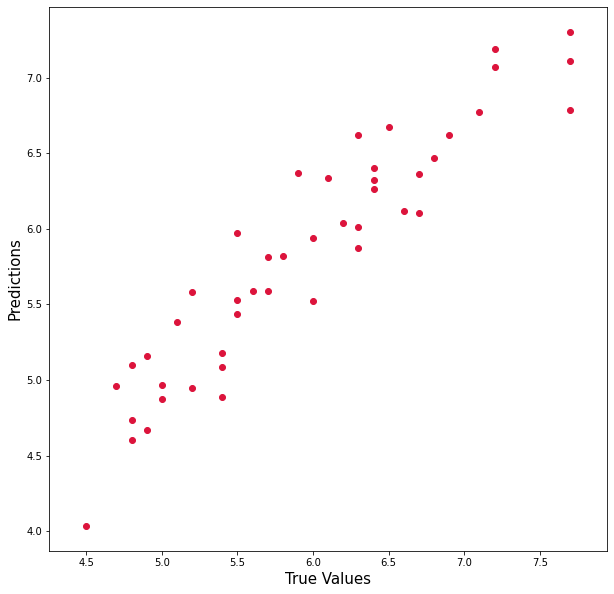

In [ ]:
#now to do regression
model = LinearRegression()
model = model.fit(X_train,y_train)

print("Intercept " , model.intercept_)
print("Coefficients " ,model.coef_)

y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
#evaluate the model use score function
print("Training score" ,model.score(X_train,y_train))
#now to get the score of testing data
print("Testing score",model.score(X_test,y_test))

compare_df = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(compare_df.head())

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')


plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


<b>Random Forest Regressor</b>

Mean squared error: 0.10
Coefficient of determination: 0.86
Training score 0.97233006104366
Testing score 0.8632708346841163
   Actual  Predicted
0     6.4      6.336
1     4.8      5.033
2     7.7      7.384
3     5.7      5.338
4     6.3      6.033


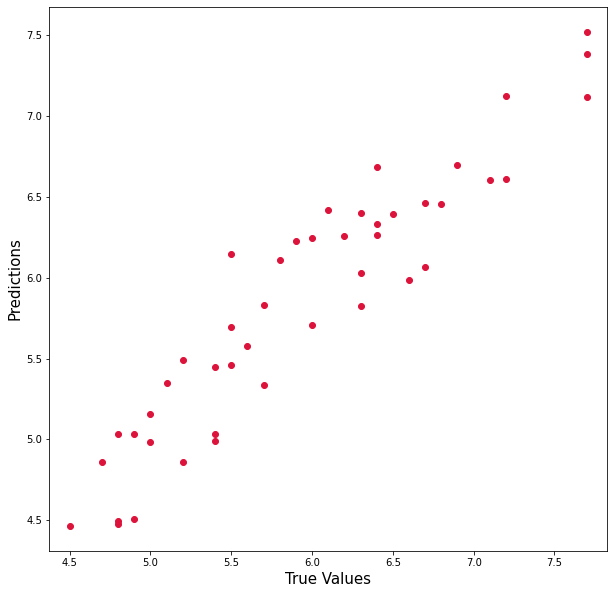

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model = model.fit(X_train,y_train.ravel())


y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
#evaluate the model use score function
print("Training score" ,model.score(X_train,y_train))
#now to get the score of testing data
print("Testing score",model.score(X_test,y_test))

compare_df = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(compare_df.head())

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')


plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<b>Polynomial regression of degree 2</b>

MSE of Polyregression model 0.10039227426543375
R2 score of Polyregression model:  0.8649476148359109
[[ 0.14653055  0.75276406 -0.48489715  0.11566273 -0.07322685  0.0616806
   0.05162001 -0.16057611  0.13221161]]
[2.38882077]
Training score 0.8571044082665376
Testing score 0.8649476148359109
   Actual  Predicted
0     6.4   6.431063
1     4.8   5.061169
2     7.7   7.294334
3     5.7   5.874187
4     6.3   6.025821


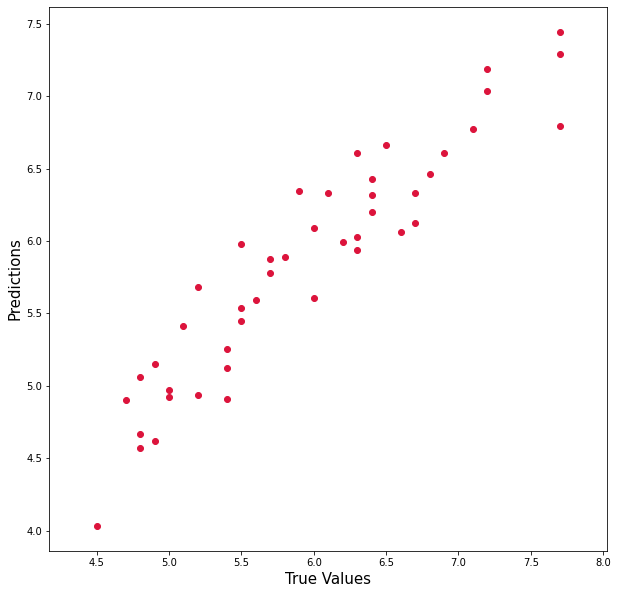

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
# poly with x^2 and x^3
polynomial = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = polynomial.fit_transform(X_train)
X_poly_test = polynomial.fit_transform(X_test)

regression = LinearRegression()
model = regression.fit(X_poly_train, y_train)
#evaluate the model use score function

y_pred = regression.predict(X_poly_test)
# model evaluation
mse_deg2 = mean_squared_error(y_test, y_pred)
  
r2_deg2 = r2_score(y_test, y_pred)
  
# printing values
  
print('MSE of Polyregression model', mse_deg2)
  
print('R2 score of Polyregression model: ', r2_deg2)

print(regression.coef_)
print(regression.intercept_)
print("Training score" ,model.score(X_poly_train,y_train))
#now to get the score of testing data
print("Testing score",model.score(X_poly_test,y_test))
compare_df = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(compare_df.head())

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')


plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<b>Polynomial regression of degree 3</b>

MSE of Polyregression model 0.18261356593095748
R2 score of Polyregression model:  0.7543396857701529
[[ -3.85086223  10.64537878 -25.82156921   2.22360386  -5.50325898
   15.10091404  -0.48140712   0.6089582    1.05068258  -0.27788433
    0.69337481  -2.1449423    0.35812667  -1.25565655   1.07763574
   -0.34563306   2.77371884  -7.30597628   6.29645174]]
[2.82710355]
Training score 0.8836289979091935
Testing score 0.7543396857701529
   Actual  Predicted
0     6.4   6.351411
1     4.8   5.071056
2     7.7   7.357951
3     5.7   5.100561
4     6.3   5.958509


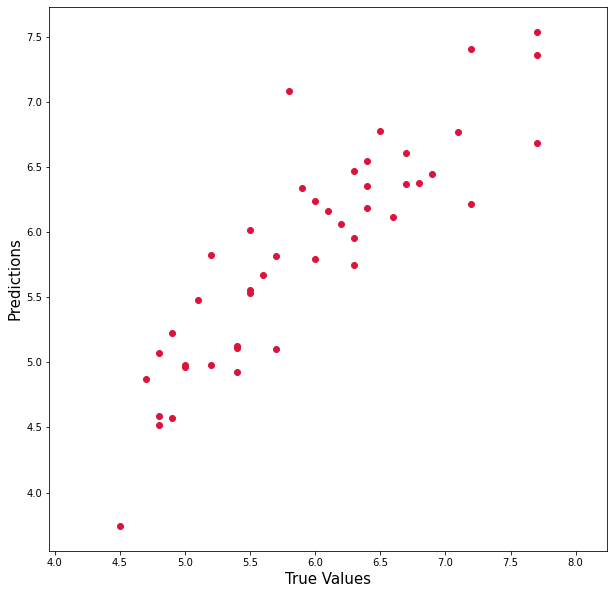

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
# poly with x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = polynomial.fit_transform(X_train)
X_poly_test = polynomial.fit_transform(X_test)

regression = LinearRegression()
model = regression.fit(X_poly_train, y_train)
#evaluate the model use score function

y_pred = regression.predict(X_poly_test)
# model evaluation
mse_deg3 = mean_squared_error(y_test, y_pred)
  
r2_deg3 = r2_score(y_test, y_pred)
  
# printing values
  
print('MSE of Polyregression model', mse_deg3)
  
print('R2 score of Polyregression model: ', r2_deg3)
print(regression.coef_)
print(regression.intercept_)
print("Training score" ,model.score(X_poly_train,y_train))
#now to get the score of testing data
print("Testing score",model.score(X_poly_test,y_test))
compare_df = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(compare_df.head())

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')


plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
X.insert(0,'BETA_0',1)
X_transpose = X.T
X_transpose.head()
X_transpose_X = X_transpose.dot(X );

X_transpose_Y =  X_transpose.dot(y );

X_transpose_X.to_numpy()
X_transpose_X_inv = np.linalg.inv(X_transpose_X) 

BETA = X_transpose_X_inv.dot(X_transpose_Y)
print(BETA)

[[ 1.85599749]
 [ 0.65083716]
 [ 0.70913196]
 [-0.55648266]]
